Part (b): Breakdown near x = π/2

x      y_exact       y_Euler       err_Euler         y_RK4         err_RK4
0.00     0.000000     0.000000       0.000×10⁰     0.000000       0.000×10⁰
0.05     0.051898     0.050000      1.898×10⁻³     0.050042      1.857×10⁻³
0.10     0.104077     0.100125      3.952×10⁻³     0.100335      3.742×10⁻³
0.16     0.156823     0.150626      6.196×10⁻³     0.151135      5.687×10⁻³
0.21     0.210434     0.201761      8.673×10⁻³     0.202710      7.724×10⁻³
0.26     0.265229     0.253796      1.143×10⁻²     0.255342      9.887×10⁻³
0.31     0.321553     0.307017      1.454×10⁻²     0.309336      1.222×10⁻²
0.36     0.379789     0.361730      1.806×10⁻²     0.365028      1.476×10⁻²
0.41     0.440368     0.418272      2.210×10⁻²     0.422793      1.757×10⁻²
0.47     0.503780     0.477020      2.676×10⁻²     0.483055      2.072×10⁻²
0.52     0.570596     0.538397      3.220×10⁻²     0.546302      2.429×10⁻²
0.57     0.641491     0.602891      3.860×10⁻²     0.61

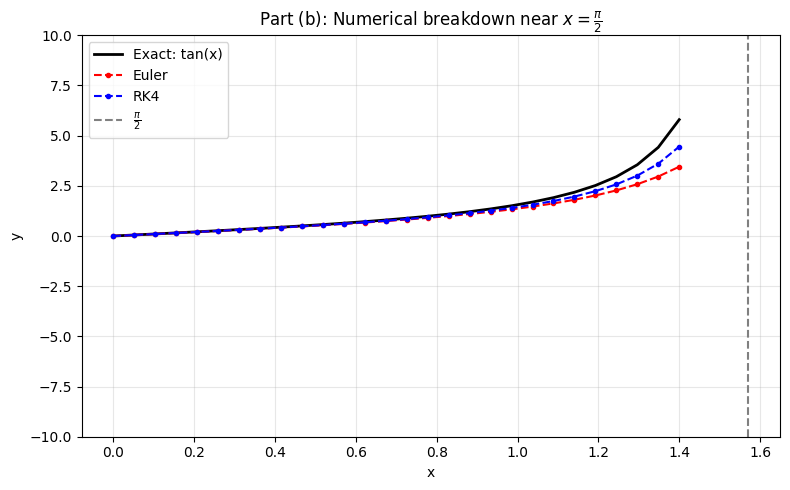

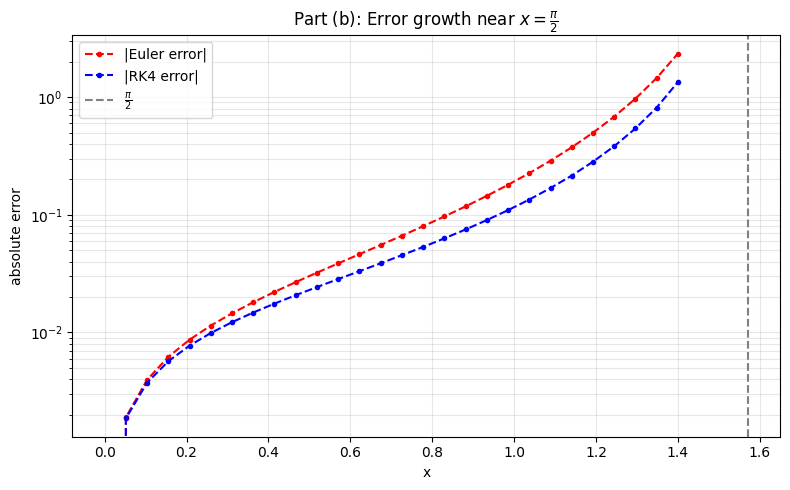

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

# ANSI color codes
RED   = "\033[31m"
BLUE  = "\033[34m"
GREEN = "\033[32m"
YEL   = "\033[33m"
RESET = "\033[0m"

# helper: scientific notation with Unicode superscript exponent
_sup_map = str.maketrans({
    "-": "⁻",
    "0": "⁰",
    "1": "¹",
    "2": "²",
    "3": "³",
    "4": "⁴",
    "5": "⁵",
    "6": "⁶",
    "7": "⁷",
    "8": "⁸",
    "9": "⁹",
})

def sci_sup(x, digits=3):
    """Return string like 3.347×10⁻⁴."""
    if x == 0:
        return f"{0:.{digits}f}×10⁰"
    exp = int(np.floor(np.log10(abs(x))))
    mant = x / 10**exp
    exp_str = str(exp).translate(_sup_map)
    return f"{mant:.{digits}f}×10{exp_str}"

# ODE and exact solution
def f(x, y):
    return y**2 + 1

def exact_solution(x):
    return np.tan(x)
def euler(f, x0, y0, h, x_end):
    N = int((x_end - x0) / h)
    xs = np.linspace(x0, x_end, N+1)
    ys = np.zeros(N+1)
    ys[0] = y0
    for n in range(N):
        ys[n + 1] = ys[n] + h * f(xs[n], ys[n])
    return xs, ys

def rk4(f, x0, y0, h, x_end):
    N = int((x_end - x0) / h)
    xs = np.linspace(x0, x_end, N+1)
    ys = np.zeros(N+1)
    ys[0] = y0
    for n in range(N):
        x, y = xs[n], ys[n]
        k1 = f(x, y)
        k2 = f(x + 0.5*h, y + 0.5*h*k1)
        k3 = f(x + 0.5*h, y + 0.5*h*k2)
        k4 = f(x + h,     y + h*k3)
        ys[n+1] = y + (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)
    return xs, ys
# ---------- PART (b) ----------
x0, y0 = 0.0, 0.0
x_end_b = 1.4           # near pi/2 ≈ 1.57
h_b = 0.05

xs_e_b, ys_e_b = euler(f, x0, y0, h_b, x_end_b)
xs_r_b, ys_r_b = rk4(f, x0, y0, h_b, x_end_b)
y_exact_b = exact_solution(xs_e_b)

err_e_b = np.abs(ys_e_b - y_exact_b)
err_r_b = np.abs(ys_r_b - y_exact_b)

print(f"{GREEN}Part (b): Breakdown near x = π/2{RESET}\n")

print(f"{YEL}x      y_exact       y_Euler       err_Euler         y_RK4         err_RK4{RESET}")
for i in range(len(xs_e_b)):
    print(
        f"{xs_e_b[i]:4.2f}  "
        f"{y_exact_b[i]:11.6f}  "
        f"{RED}{ys_e_b[i]:11.6f}  {sci_sup(err_e_b[i]):>14}{RESET}  "
        f"{BLUE}{ys_r_b[i]:11.6f}  {sci_sup(err_r_b[i]):>14}{RESET}"
    )

print(f"\n{GREEN}Max errors on [0, 1.4] with h = 0.05:{RESET}")
print(f"{RED}  Euler max error = {sci_sup(np.max(err_e_b))}{RESET}")
print(f"{BLUE}  RK4   max error = {sci_sup(np.max(err_r_b))}{RESET}")

# (optional) see where PNGs will be written
print(f"\n{GREEN}Current working directory:{RESET}", os.getcwd())

# --- Solution plot ---
plt.figure(figsize=(8,5))
plt.plot(xs_e_b, y_exact_b, 'k-', linewidth=2, label='Exact: tan(x)')
plt.plot(xs_e_b, ys_e_b, 'r.--', label='Euler')
plt.plot(xs_r_b, ys_r_b, 'b.--', label='RK4')
plt.axvline(np.pi/2, color='gray', linestyle='--', label=r"$\frac{\pi}{2}$")
plt.ylim(-10, 10)
plt.xlabel("x")
plt.ylabel("y")
plt.title(r"Part (b): Numerical breakdown near $x = \frac{\pi}{2}$")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()

plt.savefig("part_b_solution.png", dpi=300)
plt.show()

# --- Error plot (log scale) ---
plt.figure(figsize=(8,5))
plt.plot(xs_e_b, err_e_b, 'r.--', label='|Euler error|')
plt.plot(xs_r_b, err_r_b, 'b.--', label='|RK4 error|')
plt.axvline(np.pi/2, color='gray', linestyle='--', label=r"$\frac{\pi}{2}$")
plt.yscale('log')
plt.xlabel("x")
plt.ylabel("absolute error")
plt.title(r"Part (b): Error growth near $x = \frac{\pi}{2}$")
plt.grid(True, which='both', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig("part_b_error.png", dpi=300)
plt.show()
